# Analysis of Air Quality Time Series Data From Different Cities


## Austin-Round Rock / TX

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [3]:
# import data
df = pd.read_csv('air_quality/epa_air_data_daily_air_quality_ozone_pm25_austin_roundrock.csv')

In [11]:
# clean data
df.head()
df.Date = pd.to_datetime(df.Date)
df['Main Pollutant'] = df['Main Pollutant'].astype('category')
print(df.isna().sum())
print(df.dtypes)
print(df.describe())
print(df.var())

Date                         0
2020 AQI Value               0
Main Pollutant               0
Site Name                    0
Site ID                      0
Source                       0
20-year High (1980-2019)     0
20-year Low (1980-2019)      0
5-year Median (2015-2019)    0
dtype: int64
Date                         datetime64[ns]
2020 AQI Value                        int64
Main Pollutant                     category
Site Name                            object
Site ID                              object
Source                               object
20-year High (1980-2019)              int64
20-year Low (1980-2019)               int64
5-year Median (2015-2019)             int64
dtype: object
       2020 AQI Value  20-year High (1980-2019)  20-year Low (1980-2019)  \
count      112.000000                112.000000               112.000000   
mean        41.803571                 73.955357                25.660714   
std         11.098120                 17.108234                 5.7571

In [12]:
# visualize data
df.head()

,Date,2020 AQI Value,Main Pollutant,Site Name,Site ID,Source,20-year High (1980-2019),20-year Low (1980-2019),5-year Median (2015-2019)
0,2020-01-01,59,PM2.5,Austin Webberville Rd,48-453-0021,AQS,152,23,32
1,2020-01-02,55,PM2.5,Austin North Interstate 35,48-453-1068,AQS,63,15,28
2,2020-01-03,30,Ozone,Austin Northwest,48-453-0014,AQS,59,26,31
3,2020-01-04,35,Ozone,Austin Audubon Society,48-453-0020,AQS,58,19,34
4,2020-01-05,42,Ozone,Austin Northwest,48-453-0014,AQS,57,20,31


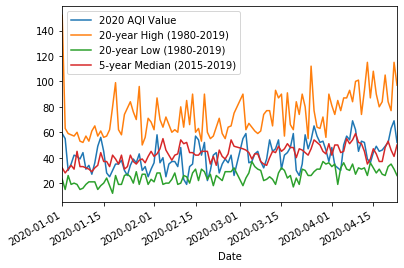

In [13]:
# plot data
%matplotlib inline
ax = plt.gca()
df.plot(kind = 'line', x = 'Date', y = '2020 AQI Value', ax = ax)
df.plot(kind = 'line', x = 'Date', y = '20-year High (1980-2019)', ax = ax)
df.plot(kind = 'line', x = 'Date', y = '20-year Low (1980-2019)', ax = ax)
df.plot(kind = 'line', x = 'Date', y = '5-year Median (2015-2019)', ax = ax)
#plt.savefig('air_quality_Austin.png')

It does not seem like Austin Air quality has varied much as it approaches the median historical data.

# San Diego Air Quality data

In [17]:
# import data
df = pd.read_csv('air_quality/epa_air_data_daily_air_quality_ozone_pm25_san_diego.csv')

In [15]:
# clean data

# missing values
df.isnull().sum()
df[df['5-year Median (2015-2019)'] == '.']
try:
    df = df.drop(59)
except:
    pass

# change data types
df = df.astype({'5-year Median (2015-2019)':'int64'})
df.Date = pd.to_datetime(df.Date)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Text(0.5, 1.0, 'San Diego Air Quality Index')

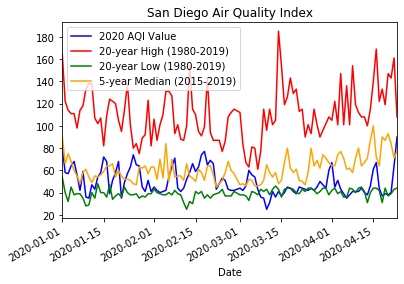

In [107]:
# visualize data
%matplotlib inline
ax = plt.gca()
df.plot(kind = 'line', x = 'Date', y = '2020 AQI Value', ax = ax, color = 'blue')
df.plot(kind = 'line', x = 'Date', y = '20-year High (1980-2019)', ax = ax, color = 'red')
df.plot(kind = 'line', x = 'Date', y = '20-year Low (1980-2019)', ax = ax, color = 'green')
df.plot(kind = 'line', x = 'Date', y = '5-year Median (2015-2019)', ax = ax, color = 'orange')
plt.title('San Diego Air Quality Index')
#plt.savefig('air_quality_San_Diego.png')

In [111]:
# import data
ozone20 = pd.read_csv('data/air_quality/2020_epa_air_data_daily_air_quality_ozone_san_diego.csv')

In [117]:
# clean data
ozone20.head()
ozone20.drop('Source',axis=1)

,Date,Site ID,POC,Daily Max 8-hour Ozone Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2020,60730001,1,0.038,ppm,35,Chula Vista,24,100.0,44201,Ozone,41740,"San Diego-Carlsbad, CA",6,California,73,San Diego,32.631242,-117.059088
1,01/02/2020,60730001,1,0.032,ppm,30,Chula Vista,24,100.0,44201,Ozone,41740,"San Diego-Carlsbad, CA",6,California,73,San Diego,32.631242,-117.059088
2,01/03/2020,60730001,1,0.036,ppm,33,Chula Vista,24,100.0,44201,Ozone,41740,"San Diego-Carlsbad, CA",6,California,73,San Diego,32.631242,-117.059088
3,01/04/2020,60730001,1,0.033,ppm,31,Chula Vista,24,100.0,44201,Ozone,41740,"San Diego-Carlsbad, CA",6,California,73,San Diego,32.631242,-117.059088
4,01/05/2020,60730001,1,0.038,ppm,35,Chula Vista,24,100.0,44201,Ozone,41740,"San Diego-Carlsbad, CA",6,California,73,San Diego,32.631242,-117.059088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,04/19/2020,60731026,1,0.042,ppm,39,San Diego - Sherman Elementary School,24,100.0,44201,Ozone,41740,"San Diego-Carlsbad, CA",6,California,73,San Diego,32.710177,-117.142665
716,04/20/2020,60731026,1,0.037,ppm,34,San Diego - Sherman Elementary School,24,100.0,44201,Ozone,41740,"San Diego-Carlsbad, CA",6,California,73,San Diego,32.710177,-117.142665
717,04/21/2020,60731026,1,0.041,ppm,38,San Diego - Sherman Elementary School,24,100.0,44201,Ozone,41740,"San Diego-Carlsbad, CA",6,California,73,San Diego,32.710177,-117.142665
718,04/22/2020,60731026,1,0.051,ppm,47,San Diego - Sherman Elementary School,24,100.0,44201,Ozone,41740,"San Diego-Carlsbad, CA",6,California,73,San Diego,32.710177,-117.142665


Different Air Quality measures API: https://aqs.epa.gov/aqsweb/documents/data_api.html#signup
check email for key